We're going to make one of these.

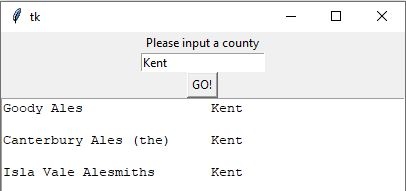



In [8]:
from tkinter import *
import logging
import sqlite3

# Running from scripts, we would import get_ale_houses() with a command like:
#import get_ale_houses

# .. but here, we'll just copy it into the cell below.  The module 
#    ipynb allows direct imports from other notebooks. 
#    Cf.  https://github.com/ipython/ipynb

In [9]:
logging.basicConfig()
logger = logging.getLogger()

In [10]:
def get_ale_houses(db, table, is_ale=1, county=0):
    "finds places based on whether they do ale and their location"

    logger.debug("Finding ale houses in {}.".format(table))

    # Establish database connectivity
    conn = sqlite3.connect(db)
    curs = conn.cursor()

    # Pick the query depending on parameters provided
    if not county:
        cmd = f"SELECT * FROM {table} WHERE is_ale={is_ale}"
    else:
        cmd = f"SELECT * FROM {table} WHERE is_ale={is_ale} AND county='{county}'"

    # Grab results
    curs.execute(cmd)
    results = curs.fetchall()

    logger.debug("... found {} ale houses!".format(len(results)))

    return results

In [11]:
# placeholder database and table values
DB = 'beer'
TABLE = 'brewpub'


class Application(Frame):
    """Application main window class."""

    def __init__(self, master=None):
        """Main frame initialization (mostly delegated)"""
        Frame.__init__(self, master)
        self.pack()
        self.createWidgets()

    def createWidgets(self):
        """Add all the widgets to the main frame."""
        
        # Main frame gets a Lable and Entry widget
        main_frame = Frame(self)
        Label(main_frame, text="Please input a county").pack()
        self.text_in = Entry(main_frame)
        self.text_in.insert("end", "Kent")
        self.text_in.pack()
        
        # Create a 'Go' button
        self.btn_go = Button(main_frame, text="GO!", command=self.handler)
        self.btn_go.pack()
        
        # Install a Text widget for output
        self.text_display = Text(main_frame, height=50, width=50)
        self.text_display.pack()
        
        # Pack the whole shebang
        main_frame.pack()

    def handler(self):
        """Runs a db query and populates the text box"""
        
        # empty existing content
        self.text_display.delete(0.0, END)
        
        # get results from the database
        text = self.text_in.get()
        if text:
            results = get_ale_houses(db=DB, table=TABLE,
                                     is_ale=1, county=text)
        else:
            results = get_ale_houses(db=DB, table=TABLE, is_ale=1)

        # add the text
        for result in results:
            name, _, county = result
            self.text_display.insert(END, "{:<25} {:<25}\n"
                                     .format(name, county))

root = Tk()
app = Application(master=root)
app.mainloop()

KeyboardInterrupt: 